In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [4]:
houseNumData.describe().round(1)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0
mean,10516.8,1515.5,1057.4,473.0,180921.2
std,9981.3,525.5,438.7,213.8,79442.5
min,1300.0,334.0,0.0,0.0,34900.0
25%,7553.5,1129.5,795.8,334.5,129975.0
50%,9478.5,1464.0,991.5,480.0,163000.0
75%,11601.5,1776.8,1298.2,576.0,214000.0
max,215245.0,5642.0,6110.0,1418.0,755000.0


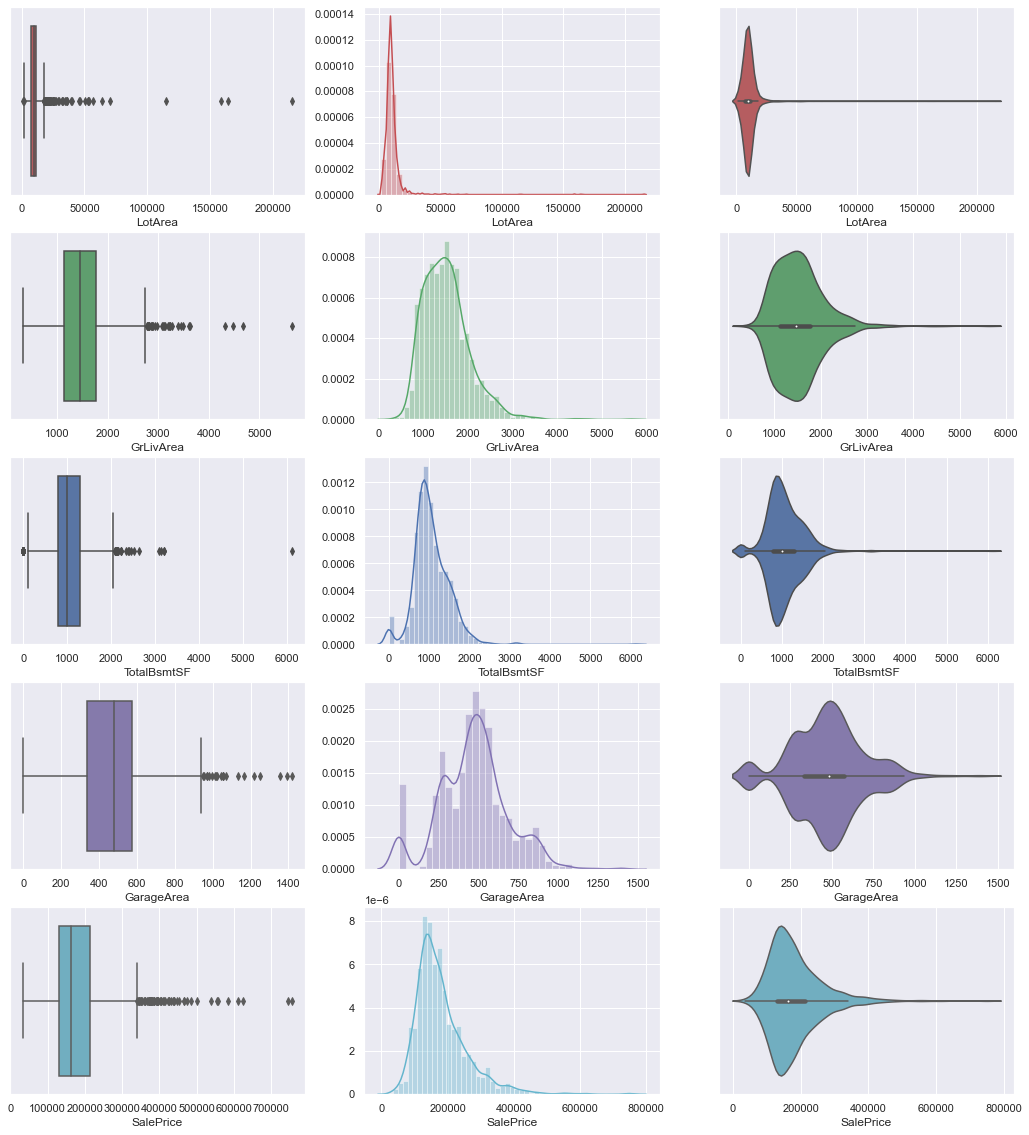

In [5]:
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in houseNumData:
    sb.boxplot(houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


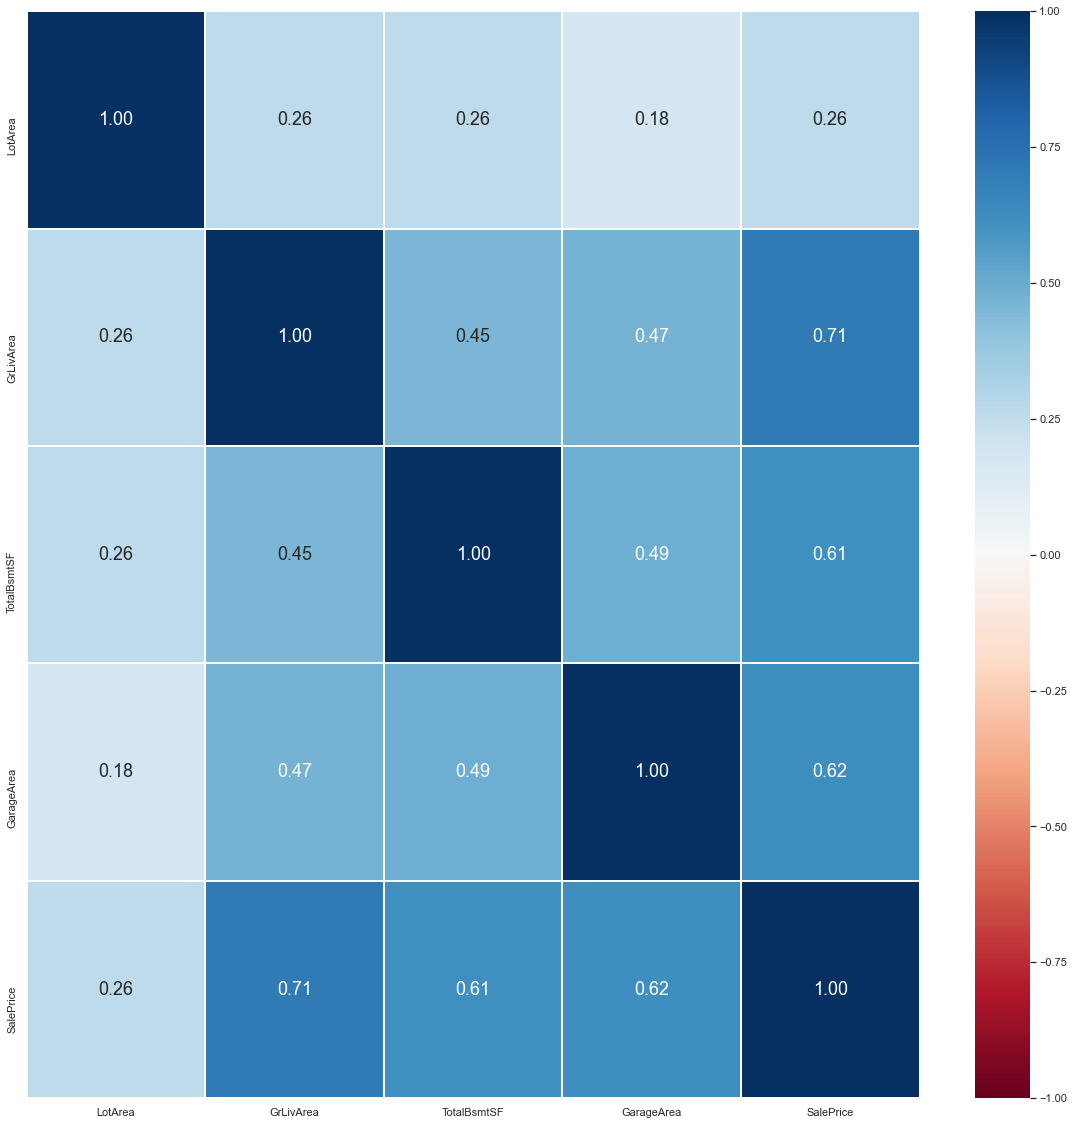

In [6]:
print(houseNumData.corr())
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

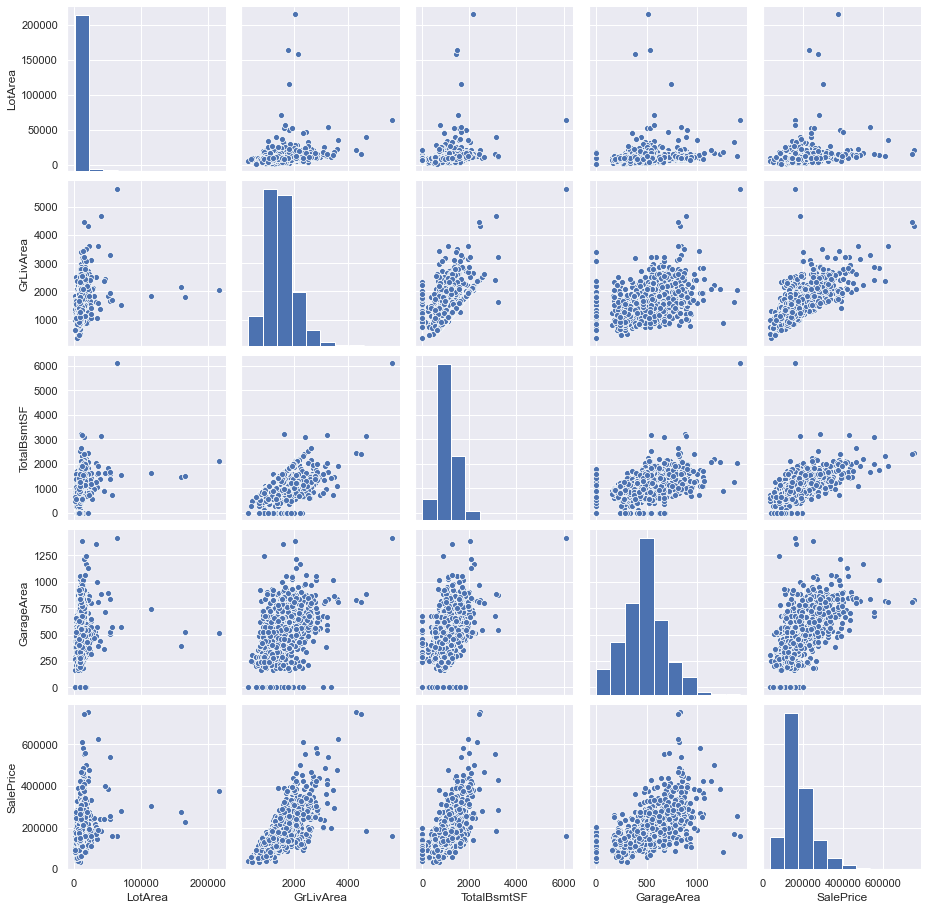

In [7]:
sb.pairplot(data = houseNumData)

In [8]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [9]:
for var in houseCatData:
    houseCatData[var] = houseCatData[var].astype('category')
houseCatData.dtypes
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


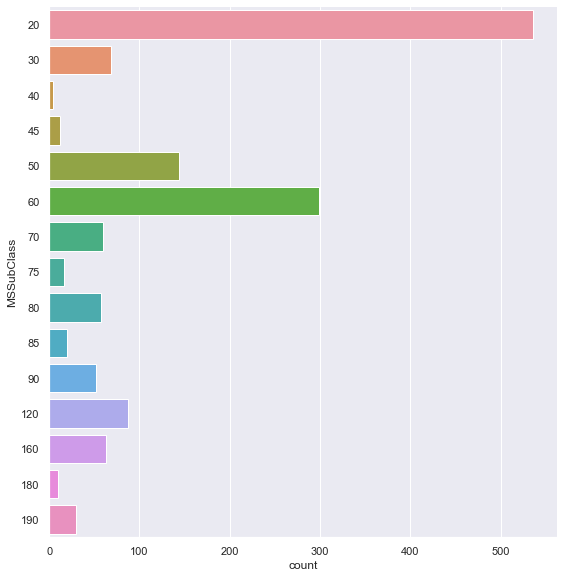

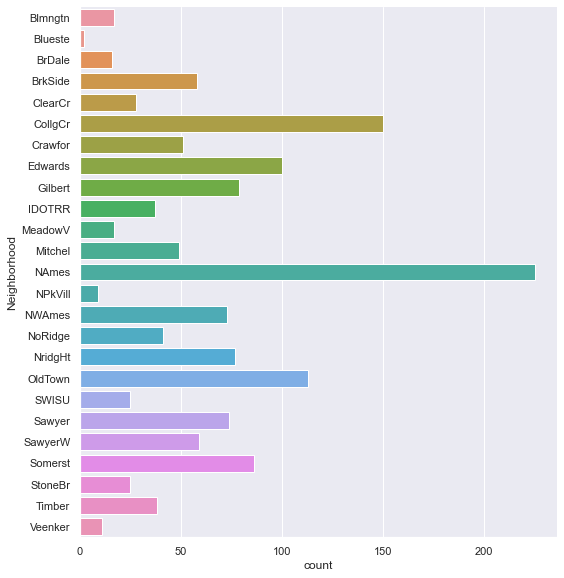

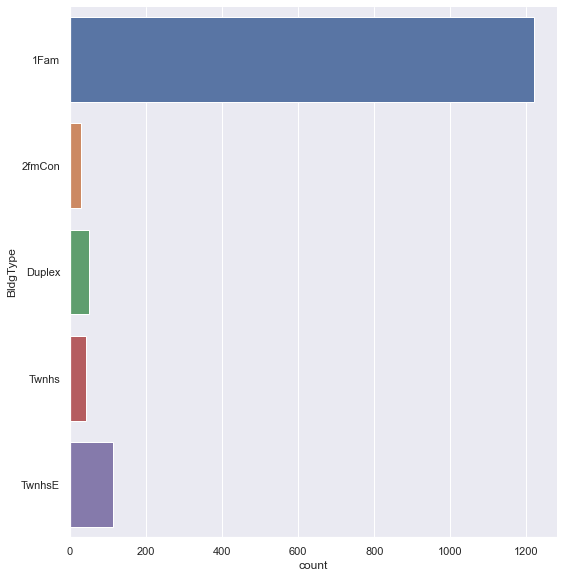

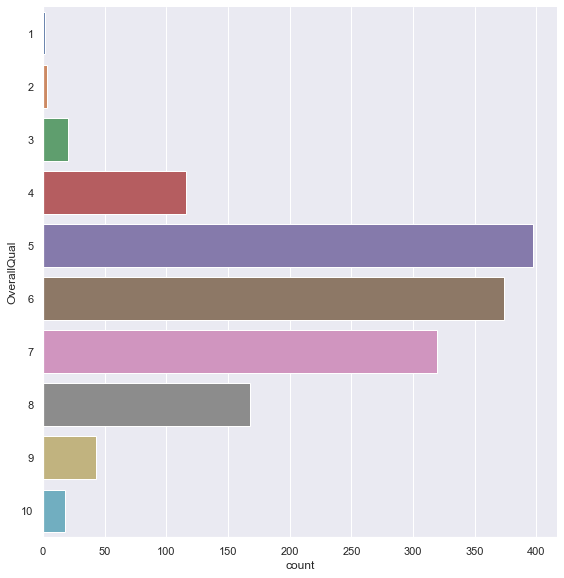

In [10]:
for var in houseCatData:
    print(houseCatData[var].value_counts())
    sb.catplot(y = var, data = houseCatData, kind = "count", height = 8)

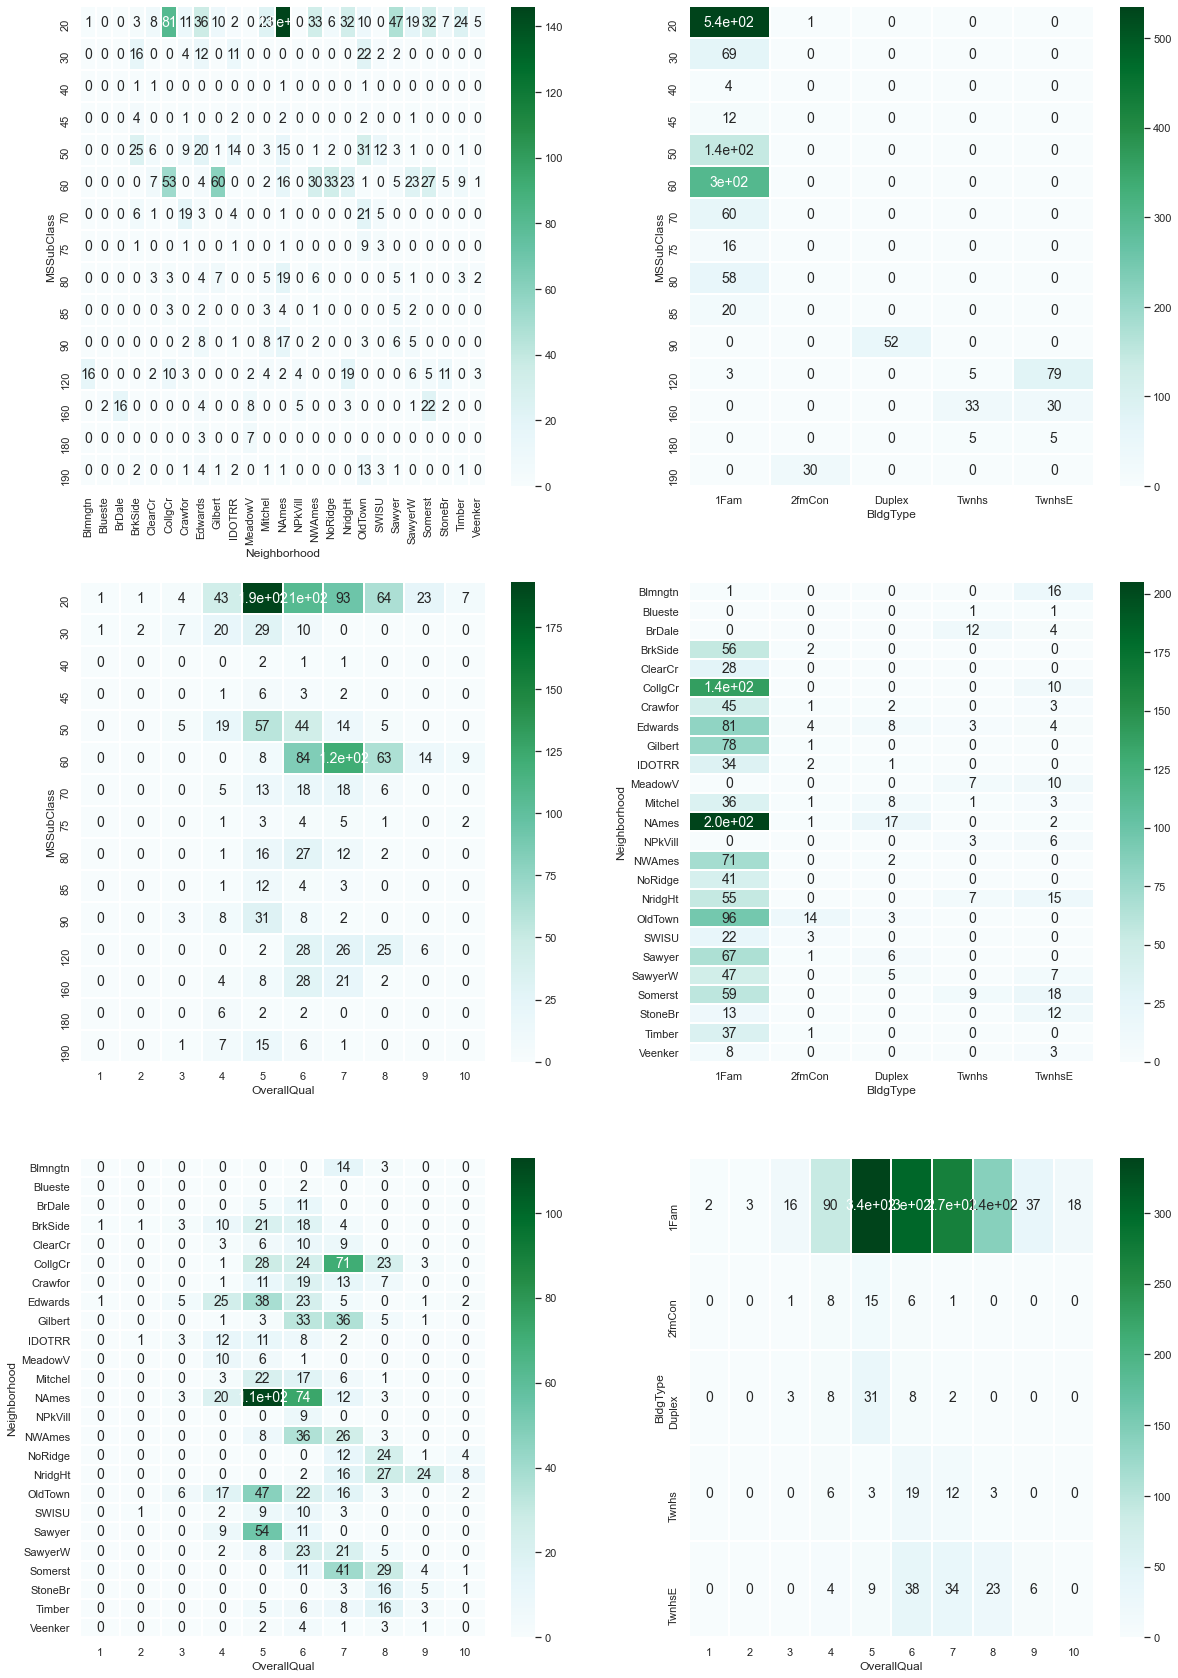

In [11]:
f, axes = plt.subplots(3, 2, figsize=(20, 30))

sb.heatmap(houseCatData.groupby(['MSSubClass', 'Neighborhood']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(houseCatData.groupby(['MSSubClass', 'BldgType']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(houseCatData.groupby(['MSSubClass', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])
sb.heatmap(houseCatData.groupby(['Neighborhood', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,1])
sb.heatmap(houseCatData.groupby(['Neighborhood', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,0])
sb.heatmap(houseCatData.groupby(['BldgType', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2,1])

In [12]:
saleprice = pd.DataFrame(houseData['SalePrice'])
houseCatSale = pd.concat([houseCatData, saleprice], axis = 1)
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


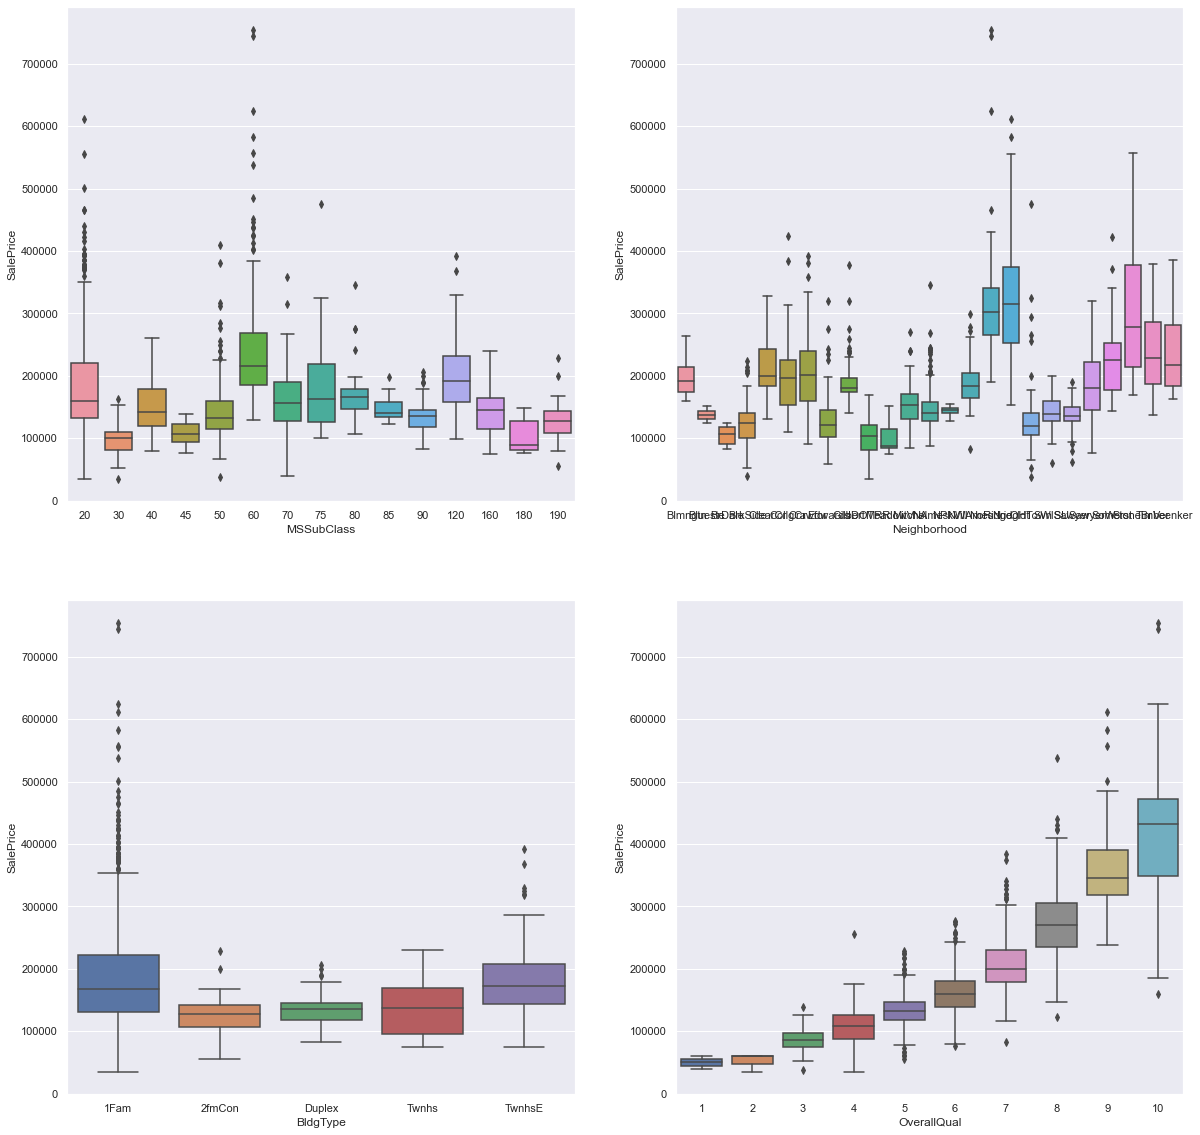

In [16]:
f, axes = plt.subplots(2, 2, figsize = (20, 20))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale, ax=axes[0, 0])
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale, ax=axes[0, 1])
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale, ax=axes[1, 0])
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale, ax=axes[1, 1])